
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A neuron is the fundamental building block of a neural network. A neruon can be thought of like a neuron in your brain in the sense that they all work together to come to a single action, decision, thought, and process. However, they each act individually from one another, while still working as a cohesive unit. A neuron is the most simple form of a neural network.

- **Input Layer:** 
An input layer is where the data is input into your Neural Network. The input layers neuron count is typically defined by the size of the images you are trying to process (i.e. a 28x28 image would contain a total of 784 pixels, which would translate into a 784-neuron input layer) An input layer is defined by a number of neurons, input dimensions of the data you are working with, and an activation function.

- **Hidden Layer:** Hidden layers are where our Neural Network does all it's thinking. We take an input, get an output, but how do we get there? It's all in the hidden layers. They will take in the activated neurons and continue to pass them through their own activation functions. If they fire on the activation, it will pass it to the N-Hidden Layer till it passes into the Output and gives you your value/prediction

- **Output Layer:** The output layer is where the output of our Neural Network comes out of. This layer needs to be build according to the activation function that is used in the output layer. A binary classification problem would use a sigmoid, which places the values between 0 and 1 so our loss function can read this and apply a "cutoff" value that turns those in the middle into either 1 or 0. Because you are classifying a binary problem, which means that either it is or it isn't, your neurons need to number 1 in your output to match with the expected output of the activation.

- **Activation:** Activation functions are what tells our neurons to "fire" or not. Basically, they become a capacitor. When your "battery" starts to fill past the point of activation, it will fire off and activate that neuron, passing it into the next layer. Acivation functions are used specifically in different situations. Softmax would be digits between 0-9. Binary would pass through a Sigmoid Activation and etc.

YOUR ANSWER HERE

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

Backpropagation takes the partial derivative of the cost function with respect to all weights and bias in the network. It gives better insights into how changing the weights and biases changes the overall behavior

Gradient Descent uses the cost function as a meter, looking to get it as close to zero as possible. It uses a learning rate that can be refered to as the step-size. It is called this as it typically defines the size of our steps, or movement through the data. A higher number means you have larger steps and less data to parse through, however, it risks overshooting the minimum and focusing too hard on large differences in the data.

These two are related as they both focus on the cost function. However, they differ in the fact that backpropagation is like gradient descent on steriods. We aren't just looking to lower the cost function in backpropagation, we are looking at how all the different components of the network work and play together to find the best fit.

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

The image is input through the input layer. The input layer takes the values and weights + bias. If passed through the activation function and the activation function fires off that neuron, it is passed into the hidden layers. The hidden layers will run it through it's own activation function and if it fires off, will continue passing through N-Hidden Layers until it reaches the output layer. Dependent upon the activation function in-place, it will change the type of output you receive. The neurons inside your hidden layers will correspond to an output that can be received as a prediction.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [7]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [6]:
X[0]

array([1.76405235, 0.40015721])

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [8]:
# Import Statements
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

"""
Layers are built with the model.add function.
* We build them as dense layers
* Includes number of neurons, input_dimensions, and activation sequence
*** Input dimensions only need to be specified within the first layer
"""
#Get input dimensions
input_dim = len(X[0])

#Define optimizer for reusability across models
opt = 'adam'
#Instantiate Sequential model
model1 = Sequential()

#Single layer with Single Neuron
model1.add(Dense(1, 
                 input_dim = input_dim, 
                 activation = 'sigmoid'
                 ))

"""
Compile takes an optimizer, loss, and a form of metrics.
Google search to find which meets up to the needs of the problem. 
Adam is most common optimizer and best for categorical problems
"""

model1.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics = ['accuracy'])

h1 = model1.fit(X,y, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 0.7669 - accuracy: 0.4933
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7651 - accuracy: 0.4933
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7635 - accuracy: 0.4933
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7618 - accuracy: 0.4933
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7601 - accuracy: 0.4967
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7584 - accuracy: 0.4967
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0.5000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7552 - accuracy: 0.5000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7536 - accuracy: 0.5000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7521 - accuracy: 0.5000


In [ ]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [ ]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense',
   'trainable': True,
   'dtype': 'float32',
   'batch_input_shape': (None, 2),
   'units': 1,
   'activation': 'sigmoid',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [9]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [10]:
model2 = Sequential()

#Hidden layer 1
model2.add(Dense(32, 
                activation='relu', 
                input_dim= 2
                ))

#Hidden layer 2
model2.add(Dense(16, 
                 activation='relu'
                 ))

#Output layer
model2.add(Dense(1, 
                 activation = 'sigmoid'))
"""
Compile takes an optimizer, loss, and a form of metrics.
Google search to find which meets up to the needs of the problem.
We will use binary cross entropy for our loss function
Adam is most common optimizer and best for categorical problems
"""
#Compile model
model2.compile(optimizer = 'nadam',
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

h2 = model2.fit(X,y, epochs=100, callbacks=[myCallback()]);

Epoch 1/100
10/10 [==============================] - 2s 3ms/step - loss: 0.6539 - accuracy: 0.7100
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.7600
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.7867
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.8167
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.8633
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.8700
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.8900
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.9000
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.9033
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.9067
Epoch 11/

In [17]:

"""
Layers are built with the model.add function.
* We build them as dense layers
* Includes number of neurons, input_dimensions, and activation sequence
*** Input dimensions only need to be specified within the first layer
"""

# Instantiate Sequential model
model2 = Sequential()

#Hidden layer 1
model2.add(Dense(32, 
                activation='relu', 
                input_dim= input_dim
                ))

#Hidden layer 2
model2.add(Dense(16, 
                 activation='relu'
                 ))

#Output layer
model2.add(Dense(1, 
                 activation = 'sigmoid'))
"""
Compile takes an optimizer, loss, and a form of metrics.
Google search to find which meets up to the needs of the problem.
We will use binary cross entropy for our loss function
Adam is most common optimizer and best for categorical problems
"""
#Compile model
model2.compile(optimizer = opt,
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

h2 = model2.fit(X,y, epochs=100, callbacks=[myCallback()]);

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6724 - accuracy: 0.6033
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6733
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.8033
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.8700
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8667
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.8767
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.8800
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8967
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.9000
Epoch 11/

In [12]:
model2= Sequential()

model2.add(Dense(32, activation='relu', input_dim=2))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
model = model2
h2 = model2
h2 = model2.fit(X, y, epochs=100, callbacks=[myCallback()])

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.3922 - accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3191 - accuracy: 0.0433
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2635 - accuracy: 0.1967
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2182 - accuracy: 0.2600
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 2.1747 - accuracy: 0.3667
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1241 - accuracy: 0.4100
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0664 - accuracy: 0.4700
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9985 - accuracy: 0.5233
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9112 - accuracy: 0.5600
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7956 - accuracy: 0.5767
Epoch

In [ ]:
model.get_config()['layers']

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_11_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense_11',
   'trainable': True,
   'dtype': 'float32',
   'batch_input_shape': (None, 2),
   'units': 32,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'Dense',
  'config': {'name': 'dense_12',
   'trainable': True,
   'dtype': 'float32',
   'units': 12,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_re

In [ ]:
# Visible test
assert len(model.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

NameError: ignored

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [13]:
!pip install mlxtend==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [14]:
model1 = Sequential([
    Dense(1, activation = 'sigmoid'),
])
model1.compile(optimizer='adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

h1 = model.fit(x=X, y=y, epochs = 3)

Epoch 1/3
10/10 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9933
Epoch 2/3
10/10 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9867
Epoch 3/3
10/10 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9867


In [16]:
X.shape, y.shape

((300, 2), (300,))

22500/22500 [==============================] - 31s 1ms/step


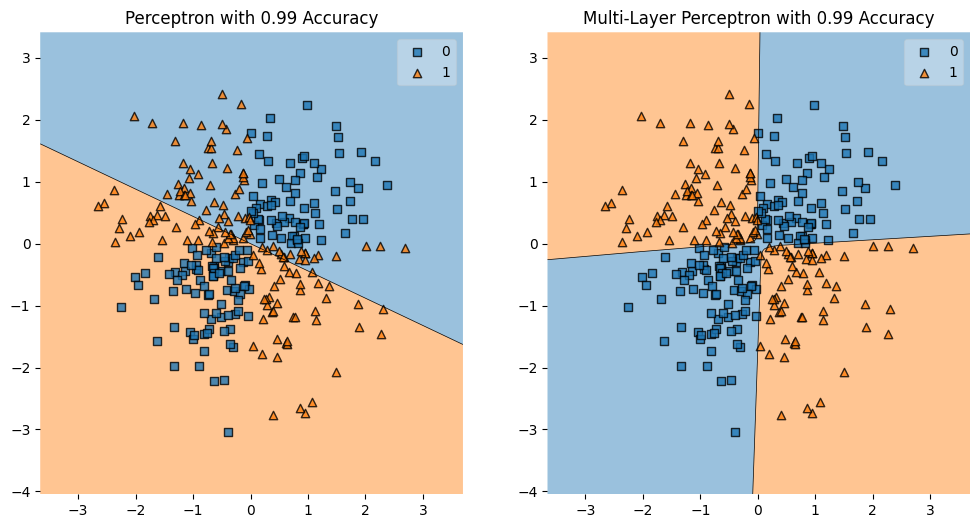

In [18]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

1) model1 takes in a single neuron and produces an output. Being such a simplistic function, it can only think in a single dimension, drawing a linear line between the data that fits the best within 10 epochs or iterations. 

2) A multi-layer perceptron can pull the data into a figure of N dimensions and find a line of correlation that fits the data better in a different dimension of space before pulling it back and fitting that line in a dimension in which we can understand the data and the line of fit.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

In [ ]:
# Create an input matrix named 'X' store it in a 2D numpy array
import numpy as np
X = df.drop(['target'], axis=1)
X = X.to_numpy()
X = np.array(X)
# Create an output vector for the labels named 'Y', store it in 1D numpy array
Y = df['target']
Y = Y.to_numpy()
Y = np.array(Y)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers

In [ ]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model():
  #Instantiate Sequential class
  model = Sequential([
                               layers.Dense(32, activation='sigmoid'),
                               layers.Dense(16, activation='sigmoid'),
                               layers.Dense(8, activation='sigmoid'),
                               layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics= ['accuracy'])
  model.fit(X,Y, epochs = 100, verbose=0)
  return model

In [ ]:
# Visible Testing
assert create_model().__module__ == 'keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [ ]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(create_model)

In [ ]:
# Visible Testing
assert model.__module__ == 'keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [ ]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 
# YOUR CODE HERE
param_grid = {
               'epochs': [10,20],
               'batch_size' : [10 , 20]
}

In [ ]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [ ]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
gs = GridSearchCV(estimator=model,
                  param_grid = param_grid,
                  n_jobs = 1,
                  verbose = 1,
                  cv = 3)
grid_result = gs.fit(X,Y)

In [ ]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 